In [441]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [540]:
asv = pd.read_csv("t_asv.csv")
kjv = pd.read_csv("t_kjv.csv")

In [541]:
kjv.head()

,Book,Chapter,Verse,Author,Text
0,40,1,1,Matthew,"The book of the generation of Jesus Christ, th..."
1,40,1,2,Matthew,Abraham begat Isaac; and Isaac begat Jacob; an...
2,40,1,3,Matthew,And Judas begat Phares and Zara of Thamar; and...
3,40,1,4,Matthew,And Aram begat Aminadab; and Aminadab begat Na...
4,40,1,5,Matthew,And Salmon begat Booz of Rachab; and Booz bega...


In [599]:
from sklearn.feature_extraction import text

bible_words=['he','shall'
,'unto'
,'lord'
,'they'
,'him'
,'them'
,'it'
,'all'
,'thou'
,'thy'
,'was'
,'god'
,'my'
,'me'
,'said'
,'ye'
,'their'
,'have'
,'will'
,'thee'
,'were'
,'man'
,'israel'
,'king'
,'son'
,'up'
,'hath'
,'then'
,'people'
,'came'
,'had'
,'house'
,'her'
,'come'
,'one'
,'we'
,'children'
,'your'
,'day'
,'land'
,'so'
,'men'
,'against'
,'shalt'
,'let'
,'go'
,'hand'
,'us'
,'saying'
,'made'
,'went'
,'even'
,'no'
,'do'
,'now'
,'behold'
,'saith'
,'therefore'
,'every'
,'our'
,'things'
,'father'
,'down'
]

stop_words=text.ENGLISH_STOP_WORDS.union(bible_words)

In [543]:
from sklearn.model_selection import train_test_split

X = kjv["Text"]
y = kjv["Author"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [544]:
len(X)

7958

In [642]:
cv = TfidfVectorizer(ngram_range=(1,3),stop_words=stop_words)
cvCounts = cv.fit_transform(X_train, y_train)
cvCounts2 = cv.fit_transform(X_test, y_test)


In [643]:
#wcss = []

#for i in range(1,11):
 #   kmeans = KMeans(n_clusters=i,init='k-means++')
  #  kmeans.fit(cvCounts)
   # wcss.append(kmeans.inertia_)
    
#plt.plot(range(1,11), wcss)
    

## Clustering

## KMeans

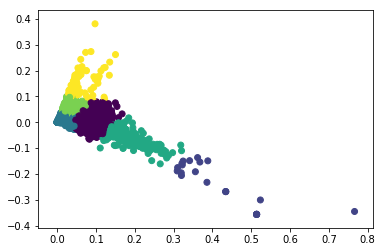

Comparing k-means clusters against the data:
Author  James  John  Jude  Luke  Mark  Matthew  Paul  Peter  Unknown
row_0                                                               
0           0   196     1   119    63      109   198      6       17
1           0     2     0     1     0        0    20      0        1
2          62   472    16  1042   276      387   978     88      163
3           2    10     4    17     3        6   112     10        3
4          19   379     2   411   148      244   208     17       41
5           0    36     0    21    21       35     2      0        0


In [684]:
# Normalize the data.
#X_norm = normalize(cvCounts)

# Reduce it to two components.
X_pca = TruncatedSVD(2).fit_transform(cvCounts)
X_pca2 = TruncatedSVD(2).fit_transform(cvCounts2)
#X_pca = NMF().fit_transform(X_pca)
# Calculate predicted values.
y_pred = KMeans(n_clusters=6).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

In [682]:
from sklearn import metrics
metrics.adjusted_rand_score(y_train, y_pred)
#metrics.accuracy_score(y_train, y_pred)

0.017007257308998266

In [683]:
metrics.silhouette_score(X_pca, y_pred)

0.5152125068993486

## Mean Shift

In [678]:
#Mean shift algorithm
from sklearn.cluster import MeanShift, estimate_bandwidth
x_array = X_pca
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(x_array, quantile=0.2, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x_array)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 22


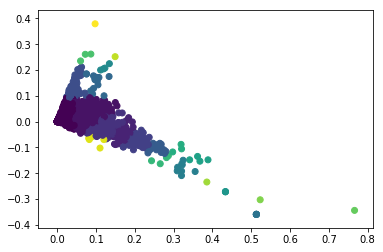

Comparing the assigned categories to the ones in the data:
Author  James  John  Jude  Luke  Mark  Matthew  Paul  Peter  Unknown
row_0                                                               
0          78   831    18  1432   419      615  1160    105      204
1           3   197     1   122    67      112   162      5       17
2           1     5     1    10     1        0    43      4        1
3           0    19     1    13     1        8    73      5        0
4           1     2     1     1     1        3    34      1        1
5           0    26     0    27    17       37     7      0        0
6           0     0     1     2     1        0    10      1        0
7           0     6     0     1     4        4     0      0        0
8           0     0     0     0     0        0     6      0        0
9           0     1     0     1     0        0     5      0        1
10          0     4     0     0     0        0     0      0        0
11          0     1     0     0     0       

In [679]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(labels, y_train))

## Spectral

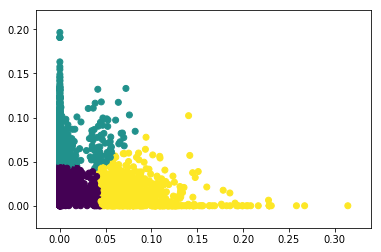

Comparing the assigned categories to the ones in the data:
Author  James  John  Jude  Luke  Mark  Matthew  Paul  Peter  Unknown
row_0                                                               
0          66   615     8  1233   379      547  1092     98      192
1          11   266     5   283    92      159   171      9       26
2           1   182     4   104    51       85   257     18       14


In [346]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(predict,y_train))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7969508905617011
For n_clusters = 3 The average silhouette_score is : 0.6324221274351225
For n_clusters = 4 The average silhouette_score is : 0.5694873892273704
For n_clusters = 5 The average silhouette_score is : 0.5842761402405903
For n_clusters = 6 The average silhouette_score is : 0.4981864159239511


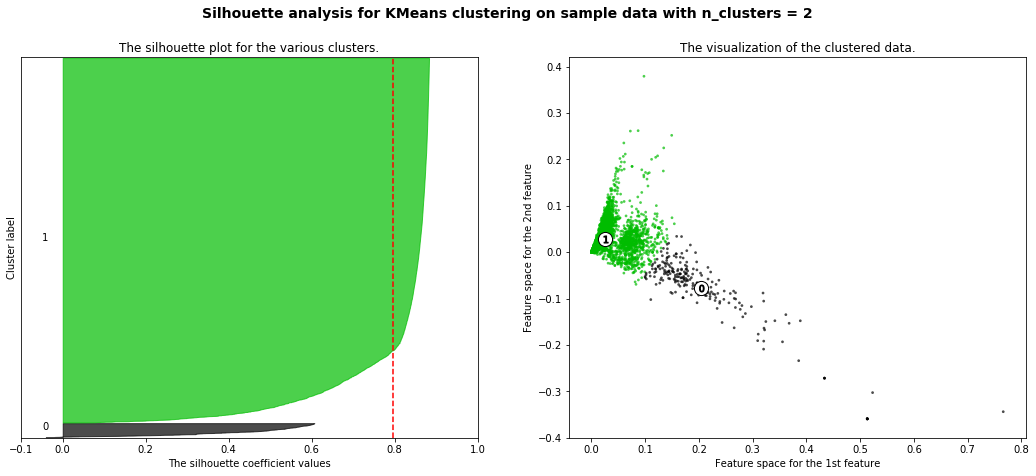

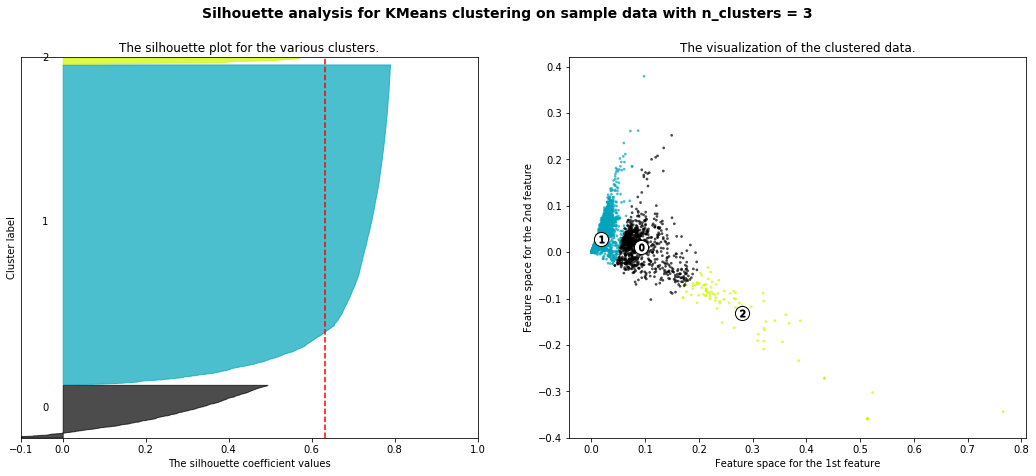

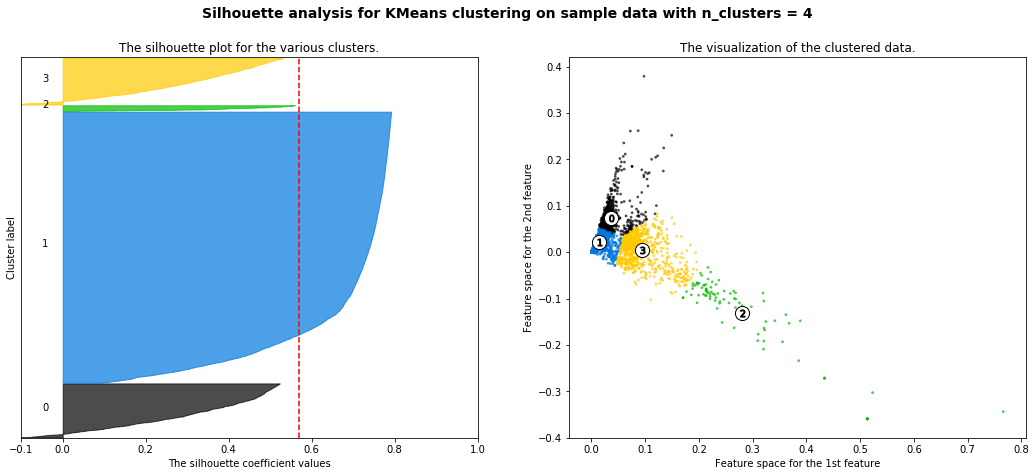

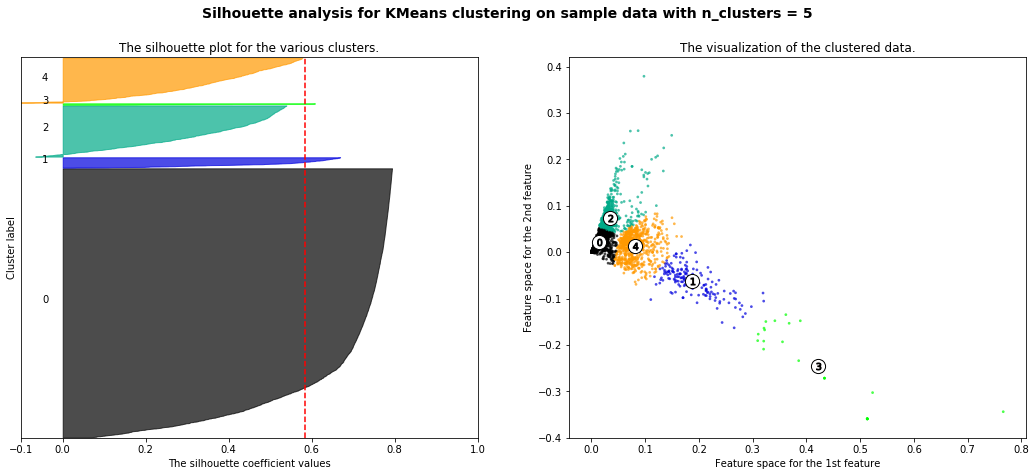

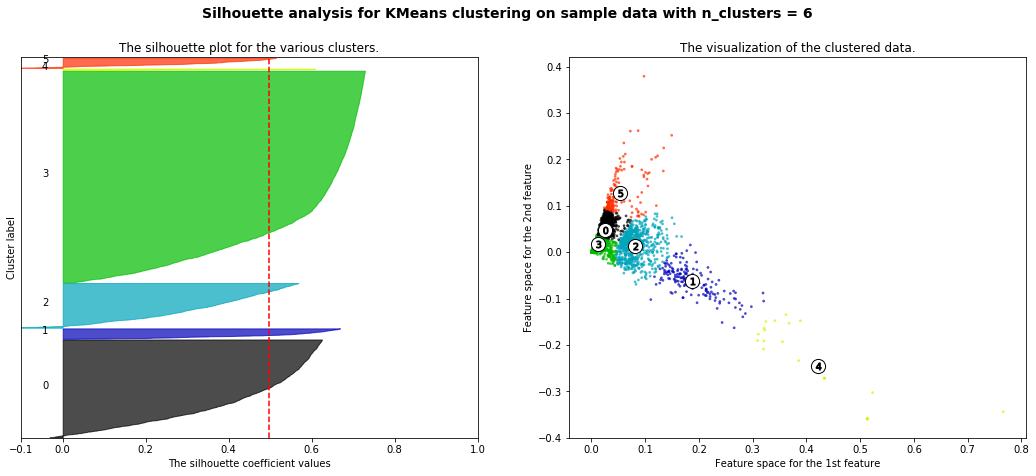

In [680]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X_pca

y = y_pred


# For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Most of the authors are put into the first cluster, even though we now have a good silhouette score

In [707]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.decomposition import NMF
from sklearn.neural_network import MLPClassifier
# Naive Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)),
                     ('clf', LinearSVC()),
])

#Logistic Regression
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)),
                     ('clf', LogisticRegression()),
])

#Random Forest
text_clf_rfc = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)),
                     ('clf', ensemble.RandomForestClassifier(n_estimators=500, max_depth=20)),
])

#Neural Network
text_clf_nn = Pipeline([('tfidf', TfidfVectorizer(max_df=.5, min_df=2,stop_words=stop_words)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(50,2)))

])


## Naive Bayes

In [708]:
#run Naive Bayes first

text_clf_nb.fit(X_train, y_train)

#run predictions
prednb = text_clf_nb.predict(X_test)


In [709]:
df3 = pd.DataFrame(metrics.confusion_matrix(y_test,prednb), 
      index=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'], 
     columns=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'])
df3

,James,John,Jude,Luke,Mark,Matthew,Paul,Peter,Unknown
James,0,0,0,18,0,0,7,0,0
John,0,144,0,142,0,1,34,0,0
Jude,0,0,0,1,0,0,1,0,0
Luke,0,18,0,475,0,16,38,0,0
Mark,0,6,0,134,1,17,9,0,0
Matthew,0,18,0,222,0,32,18,0,0
Paul,0,7,0,278,0,0,230,0,0
Peter,0,0,0,32,0,0,13,0,0
Unknown,0,4,0,61,0,0,13,0,0


In [710]:
print(metrics.classification_report(y_test,prednb))

c:\users\sakok\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       James       0.00      0.00      0.00        25
        John       0.73      0.45      0.56       321
        Jude       0.00      0.00      0.00         2
        Luke       0.35      0.87      0.50       547
        Mark       1.00      0.01      0.01       167
     Matthew       0.48      0.11      0.18       290
        Paul       0.63      0.45      0.52       515
       Peter       0.00      0.00      0.00        45
     Unknown       0.00      0.00      0.00        78

   micro avg       0.44      0.44      0.44      1990
   macro avg       0.36      0.21      0.20      1990
weighted avg       0.53      0.44      0.39      1990



In [711]:
print(metrics.accuracy_score(y_test,prednb))

0.44321608040201005


In [712]:
cross_val_score(text_clf_nb, X_test, y_test, cv=10)

c:\users\sakok\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.34482759, 0.36633663, 0.37810945, 0.38308458, 0.34825871,
       0.36868687, 0.37373737, 0.38265306, 0.35897436, 0.38461538])

## Linear SVC

In [713]:
#let's run linear SVC next
text_clf_lsvc.fit(X_train, y_train)
#predictions
predsvc = text_clf_lsvc.predict(X_test)

In [714]:
df4 = pd.DataFrame(metrics.confusion_matrix(y_test,predsvc), 
      index=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'], 
     columns=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'])
df4

,James,John,Jude,Luke,Mark,Matthew,Paul,Peter,Unknown
James,3,1,0,14,0,1,4,1,1
John,1,179,0,95,8,8,30,0,0
Jude,0,1,0,0,0,0,1,0,0
Luke,1,42,0,362,41,63,38,0,0
Mark,0,12,0,82,16,51,5,0,1
Matthew,0,27,0,133,46,76,8,0,0
Paul,3,21,1,248,3,12,221,2,4
Peter,1,0,1,25,1,2,13,2,0
Unknown,1,6,1,43,1,4,11,0,11


In [715]:
print(metrics.classification_report(y_test,predsvc))

              precision    recall  f1-score   support

       James       0.30      0.12      0.17        25
        John       0.62      0.56      0.59       321
        Jude       0.00      0.00      0.00         2
        Luke       0.36      0.66      0.47       547
        Mark       0.14      0.10      0.11       167
     Matthew       0.35      0.26      0.30       290
        Paul       0.67      0.43      0.52       515
       Peter       0.40      0.04      0.08        45
     Unknown       0.65      0.14      0.23        78

   micro avg       0.44      0.44      0.44      1990
   macro avg       0.39      0.26      0.27      1990
weighted avg       0.47      0.44      0.42      1990



In [716]:
print(metrics.accuracy_score(y_test,predsvc))

0.4371859296482412


In [717]:
cross_val_score(text_clf_lsvc, X_test, y_test, cv=10)

c:\users\sakok\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.34975369, 0.38118812, 0.40298507, 0.40298507, 0.39303483,
       0.38383838, 0.34848485, 0.43877551, 0.35384615, 0.4       ])

## Logistic Regression

In [718]:
#run Naive Bayes first
text_clf_lr.fit(X_train, y_train)

#run predictions
predlr = text_clf_lr.predict(X_test)


c:\users\sakok\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [719]:
df5 = pd.DataFrame(metrics.confusion_matrix(y_test,predlr), 
      index=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'], 
     columns=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'])
df5

,James,John,Jude,Luke,Mark,Matthew,Paul,Peter,Unknown
James,0,0,0,18,0,0,7,0,0
John,0,117,0,167,0,0,37,0,0
Jude,0,0,0,1,0,0,1,0,0
Luke,0,13,0,482,0,14,38,0,0
Mark,0,7,0,138,1,13,8,0,0
Matthew,0,11,0,227,1,33,18,0,0
Paul,0,0,0,284,0,0,231,0,0
Peter,0,0,0,32,0,0,13,0,0
Unknown,0,3,0,62,0,0,13,0,0


In [720]:
print(metrics.classification_report(y_test,predlr))

c:\users\sakok\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       James       0.00      0.00      0.00        25
        John       0.77      0.36      0.50       321
        Jude       0.00      0.00      0.00         2
        Luke       0.34      0.88      0.49       547
        Mark       0.50      0.01      0.01       167
     Matthew       0.55      0.11      0.19       290
        Paul       0.63      0.45      0.52       515
       Peter       0.00      0.00      0.00        45
     Unknown       0.00      0.00      0.00        78

   micro avg       0.43      0.43      0.43      1990
   macro avg       0.31      0.20      0.19      1990
weighted avg       0.50      0.43      0.38      1990



In [721]:
print(metrics.accuracy_score(y_test,predlr))

0.43417085427135677


In [722]:
cross_val_score(text_clf_lr, X_test, y_test, cv=10)

c:\users\sakok\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\sakok\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0.33990148, 0.34653465, 0.3681592 , 0.3681592 , 0.34328358,
       0.37373737, 0.37373737, 0.3622449 , 0.34358974, 0.38974359])

## Random Forest

In [723]:
rfc = ensemble.RandomForestClassifier(n_estimators=500, max_depth=20)
cv = TfidfVectorizer(stop_words=stop_words)
#cvCounts = cv.fit_transform(X,y)

#cvCounts2 = cv.fit_transform(X_test)
#X_pca = NMF().fit_transform(cvCounts)
#X_pca2 = NMF(5).fit_transform(cvCounts2)


text_clf_rfc.fit(X_train, y_train)

predrfc2 = text_clf_rfc.predict(X_test)

In [724]:
dfbowrfc = pd.DataFrame(metrics.confusion_matrix(y_test,predrfc2), 
      index=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'], 
     columns=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'])
dfbowrfc

,James,John,Jude,Luke,Mark,Matthew,Paul,Peter,Unknown
James,0,0,0,25,0,0,0,0,0
John,0,13,0,296,0,0,12,0,0
Jude,0,0,0,2,0,0,0,0,0
Luke,0,0,0,543,0,0,4,0,0
Mark,0,0,0,166,0,0,1,0,0
Matthew,0,1,0,289,0,0,0,0,0
Paul,0,0,0,454,0,0,61,0,0
Peter,0,0,0,37,0,0,8,0,0
Unknown,0,0,0,76,0,0,2,0,0


In [725]:
print(metrics.classification_report(y_test,predrfc2))

c:\users\sakok\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       James       0.00      0.00      0.00        25
        John       0.93      0.04      0.08       321
        Jude       0.00      0.00      0.00         2
        Luke       0.29      0.99      0.45       547
        Mark       0.00      0.00      0.00       167
     Matthew       0.00      0.00      0.00       290
        Paul       0.69      0.12      0.20       515
       Peter       0.00      0.00      0.00        45
     Unknown       0.00      0.00      0.00        78

   micro avg       0.31      0.31      0.31      1990
   macro avg       0.21      0.13      0.08      1990
weighted avg       0.41      0.31      0.19      1990



In [726]:
print(metrics.accuracy_score(y_test,predrfc2))

0.3100502512562814


In [727]:
cross_val_score(text_clf_rfc, X_test, y_test, cv=5)

c:\users\sakok\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.30174564, 0.31      , 0.29974811, 0.30808081, 0.32070707])

## Neural Network

In [501]:
text_clf_nn.fit(X_train, y_train)

prednn = text_clf_nn.predict(X_test)

c:\users\sakok\miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [502]:
dfbowrfc = pd.DataFrame(metrics.confusion_matrix(y_test,prednn), 
      index=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'], 
     columns=['James','John','Jude',
            'Luke','Mark','Matthew','Paul',
            'Peter','Unknown'])
dfbowrfc

,James,John,Jude,Luke,Mark,Matthew,Paul,Peter,Unknown
James,0,3,0,3,3,1,7,1,4
John,0,151,0,100,26,24,48,3,2
Jude,0,0,0,0,0,0,2,0,0
Luke,1,88,0,275,56,49,44,5,9
Mark,0,19,0,47,31,40,8,3,5
Matthew,4,38,0,77,83,53,22,2,1
Paul,5,86,0,38,14,5,321,20,43
Peter,1,2,0,6,5,1,20,7,3
Unknown,2,6,0,11,6,2,23,8,17


In [503]:
print(metrics.classification_report(y_test,prednn))

c:\users\sakok\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       James       0.00      0.00      0.00        22
        John       0.38      0.43      0.40       354
        Jude       0.00      0.00      0.00         2
        Luke       0.49      0.52      0.51       527
        Mark       0.14      0.20      0.16       153
     Matthew       0.30      0.19      0.23       280
        Paul       0.65      0.60      0.63       532
       Peter       0.14      0.16      0.15        45
     Unknown       0.20      0.23      0.21        75

   micro avg       0.43      0.43      0.43      1990
   macro avg       0.26      0.26      0.26      1990
weighted avg       0.44      0.43      0.43      1990



In [505]:
print(metrics.accuracy_score(y_test,prednn))

0.4296482412060301


In [ ]:
cross_val_score(text_clf_nn, X_test, y_test, cv=5)